### Import Libraries

In [102]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

### Import Datasets

**Accidents Dataset**

In [2]:
df_a = pd.read_csv("Road Safety Data - Accidents 2019.csv")
df_a.head(2)

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,...,0,5,1,1,1,0,0,1,3,E01004762
1,2019010152270,530219.0,172463.0,-0.127949,51.436208,1,3,2,1,15/01/2019,...,-1,-1,4,1,1,0,0,1,3,E01003117


**Vehicles Dataset**

In [3]:
df_v = pd.read_csv("Road Safety Data- Vehicles 2019.csv")
df_v.head(2)

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
0,2019010128300,1,9,0,-1,-1,-1,-1,-1,-1,...,6,1,58,9,-1,-1,-1,2,1,2
1,2019010128300,2,9,0,-1,-1,-1,-1,-1,-1,...,6,3,-1,-1,-1,-1,-1,2,1,2


**Combine Datasets**

In [4]:
df = pd.merge(df_a, df_v, how = "inner", on = "Accident_Index")
df.head(2)

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
0,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,...,6,1,58,9,-1,-1,-1,2,1,2
1,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,...,6,3,-1,-1,-1,-1,-1,2,1,2


### Questions

**(a) Are there significant hours of the day, and days of the week, on which accidents occur?**

Accidents occur by Hour

In [5]:
hours = df_a["Time"].str.split(":").str.get(0)
hours = pd.DataFrame(hours)
hours = pd.DataFrame(hours.value_counts().sort_index()).reset_index()
hours.columns = ["Hours", "Accidents"]
hours

,Hours,Accidents
0,00,1830
1,01,1327
2,02,966
3,03,827
4,04,791
5,05,1169
6,06,2404
7,07,5353
8,08,8127
9,09,5497


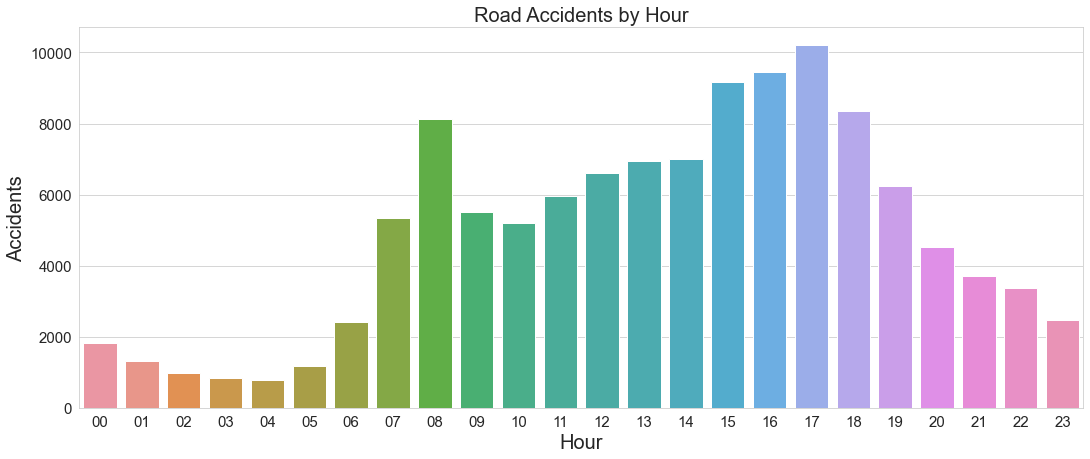

In [116]:
sns.set_style("whitegrid")
plt.figure(figsize = (18, 7))
sns.barplot(x = "Hours", y = "Accidents", data = hours)
plt.title("Road Accidents by Hour", size = 20)
plt.xlabel("Hour", size = 20)
plt.ylabel("Accidents", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.savefig("raby.png")
plt.show()

Accidents Occur by Day of Week

In [7]:
day_of_week = df_a["Day_of_Week"].value_counts().sort_index().to_frame().reset_index()
day_of_week.columns = ["Day of Week", "Accidents"]
day_of_week

,Day of Week,Accidents
0,1,12935
1,2,16643
2,3,17598
3,4,17775
4,5,17973
5,6,19056
6,7,15556


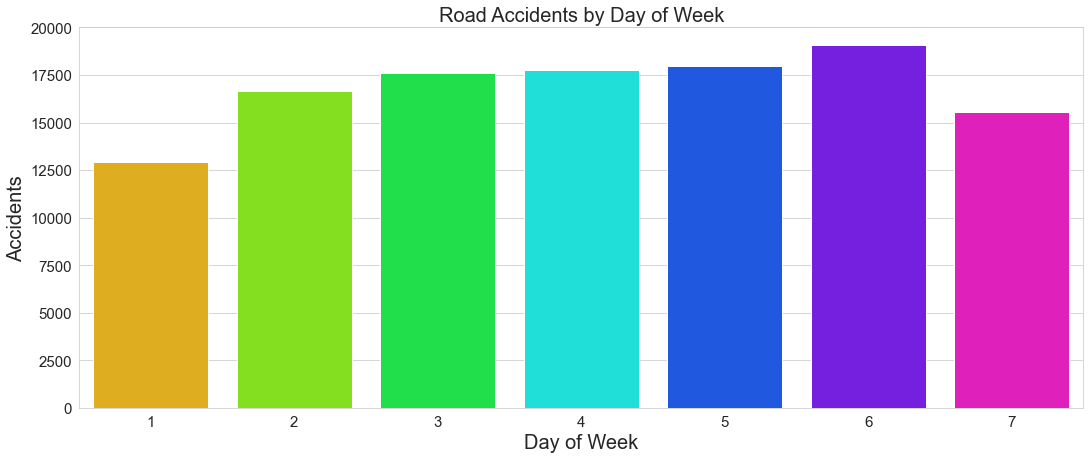

In [117]:
plt.figure(figsize = (18, 7))
sns.barplot(x = "Day of Week", y = "Accidents", data = day_of_week, palette = "hsv")
plt.title("Road Accidents by Day of Week", size = 20)
plt.xlabel("Day of Week", size = 20)
plt.ylabel("Accidents", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.savefig("radw.png")
plt.show()

**(b) For motorbikes, are there significant hours of the day, and days of the week, on which accidents occur?**

In [9]:
df_a["Hour"] = df_a["Time"].str.split(":").str.get(0)

In [10]:
df["Hour"] = df["Time"].str.split(":").str.get(0)

In [11]:
motorbikes = df[(df["Vehicle_Type"] == 2) |
                (df["Vehicle_Type"] == 3) |
                (df["Vehicle_Type"] == 4) |
                (df["Vehicle_Type"] == 5) |
                (df["Vehicle_Type"] == 23)|
                (df["Vehicle_Type"] == 97)]
motorbikes.head(2)

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile,Hour
30,2019010155225,512750.0,180199.0,-0.376691,51.509481,1,3,2,1,01/01/2019,...,1,30,6,-1,-1,-1,4,1,4,00
39,2019010155254,534122.0,189977.0,-0.065175,51.592686,1,3,2,1,01/01/2019,...,1,19,4,-1,-1,-1,2,1,2,14


Motorbikes accidents occur by hour of day

In [12]:
bikes_hours = motorbikes.groupby(["Hour", "Vehicle_Type"])["Vehicle_Type"].agg(["count"]).reset_index()
bikes_hours

,Hour,Vehicle_Type,count
0,00,2,20
1,00,3,90
2,00,4,17
3,00,5,29
4,00,97,6
...,...,...,...
131,23,2,30
132,23,3,156
133,23,4,33
134,23,5,42


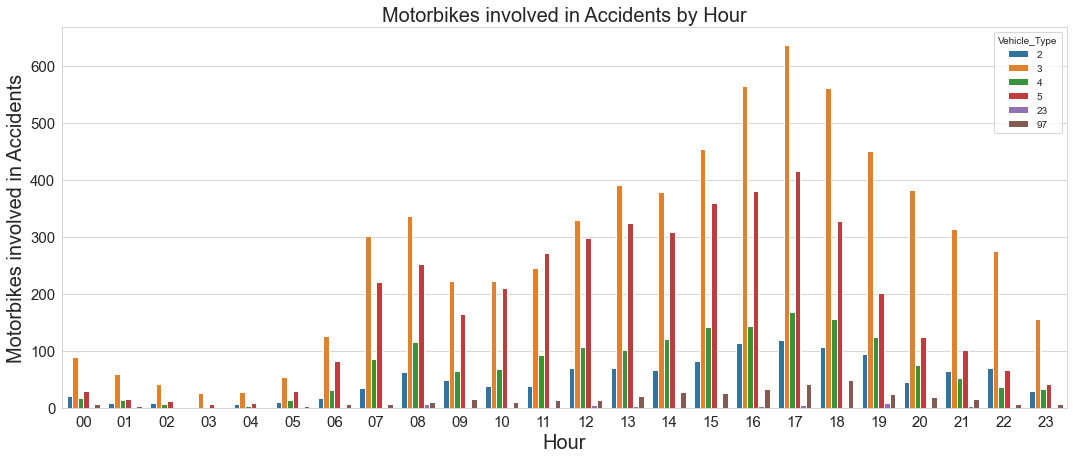

In [131]:
plt.figure(figsize = (18, 7))
sns.barplot(x = "Hour", y = "count", hue = "Vehicle_Type", data = bikes_hours)
plt.title("Motorbikes involved in Accidents by Hour", size = 20)
plt.xlabel("Hour", size = 20)
plt.ylabel("Motorbikes involved in Accidents", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.savefig("mah.png")
plt.show()

Motorbikes accidents occur by day of week

In [14]:
bikes_day_of_week = motorbikes.groupby(["Day_of_Week", "Vehicle_Type"])["Vehicle_Type"].agg(["count"]).reset_index()
bikes_day_of_week

,Day_of_Week,Vehicle_Type,count
0,1,2,146
1,1,3,717
2,1,4,234
3,1,5,692
4,1,23,8
5,1,97,49
6,2,2,157
7,2,3,883
8,2,4,248
9,2,5,520


In [143]:
bikes_day_of_week[bikes_day_of_week["Vehicle_Type"] == 97].sort_values(by = "count")

,Day_of_Week,Vehicle_Type,count
11,2,97,42
23,4,97,44
5,1,97,49
17,3,97,50
35,6,97,53
29,5,97,59
41,7,97,61


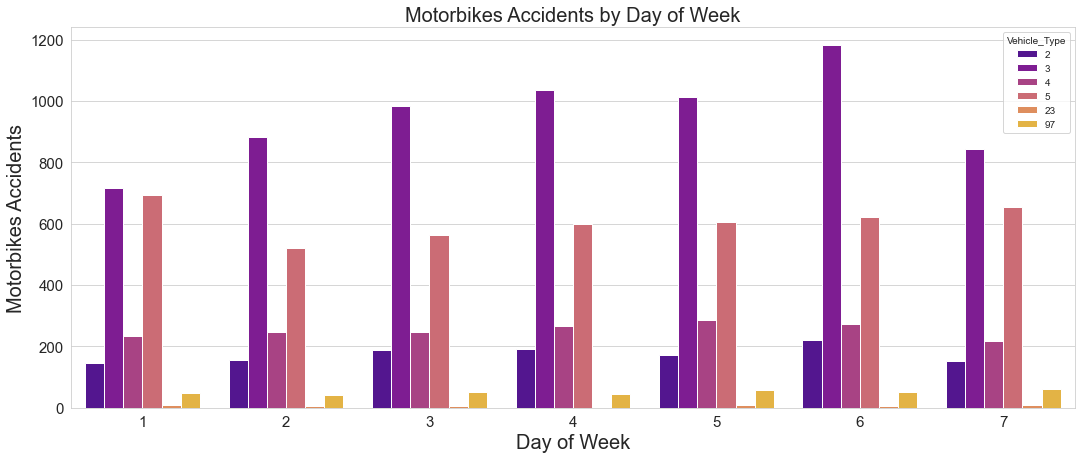

In [144]:
plt.figure(figsize = (18, 7))
sns.barplot(x = "Day_of_Week", y = "count", hue = "Vehicle_Type", data = bikes_day_of_week, palette = "plasma")
plt.title("Motorbikes Accidents by Day of Week", size = 20)
plt.xlabel("Day of Week", size = 20)
plt.ylabel("Motorbikes Accidents", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.savefig("MADW.png")
plt.show()

**(c) For pedestrians involved in accidents, are there significant hours of the day, and days of the week, on which they are more likely to be involved?**

padestrians involved in accidents by hours of the day

In [16]:
padestrians_hour = df_a.groupby(["Hour", "Pedestrian_Crossing-Physical_Facilities"])["Pedestrian_Crossing-Physical_Facilities"].agg(["count"]).reset_index()
padestrians_hour

,Hour,Pedestrian_Crossing-Physical_Facilities,count
0,00,-1,32
1,00,0,1418
2,00,1,51
3,00,4,108
4,00,5,174
...,...,...,...
163,23,1,98
164,23,4,128
165,23,5,249
166,23,7,5


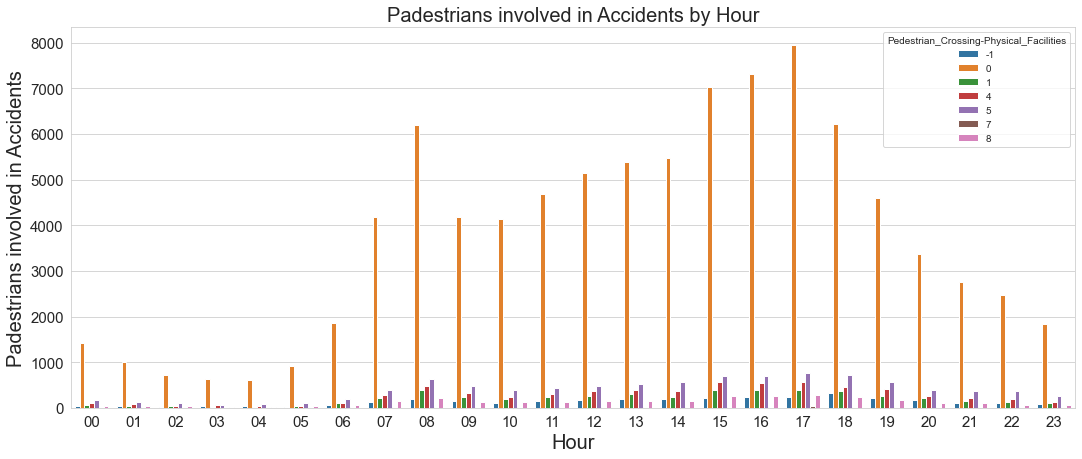

In [134]:
plt.figure(figsize = (18, 7))
sns.barplot(x = "Hour", y = "count", hue = "Pedestrian_Crossing-Physical_Facilities", data = padestrians_hour)
plt.title("Padestrians involved in Accidents by Hour", size = 20)
plt.xlabel("Hour", size = 20)
plt.ylabel("Padestrians involved in Accidents", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.savefig("PAH.png")
plt.show()

padestrians involved in accidents by day of week

In [18]:
padestrians_day = df_a.groupby(["Day_of_Week", "Pedestrian_Crossing-Physical_Facilities"])["Pedestrian_Crossing-Physical_Facilities"].agg(["count"]).reset_index()
padestrians_day

,Day_of_Week,Pedestrian_Crossing-Physical_Facilities,count
0,1,-1,342
1,1,0,10030
2,1,1,455
3,1,4,656
4,1,5,1099
5,1,7,31
6,1,8,322
7,2,-1,439
8,2,0,12789
9,2,1,685


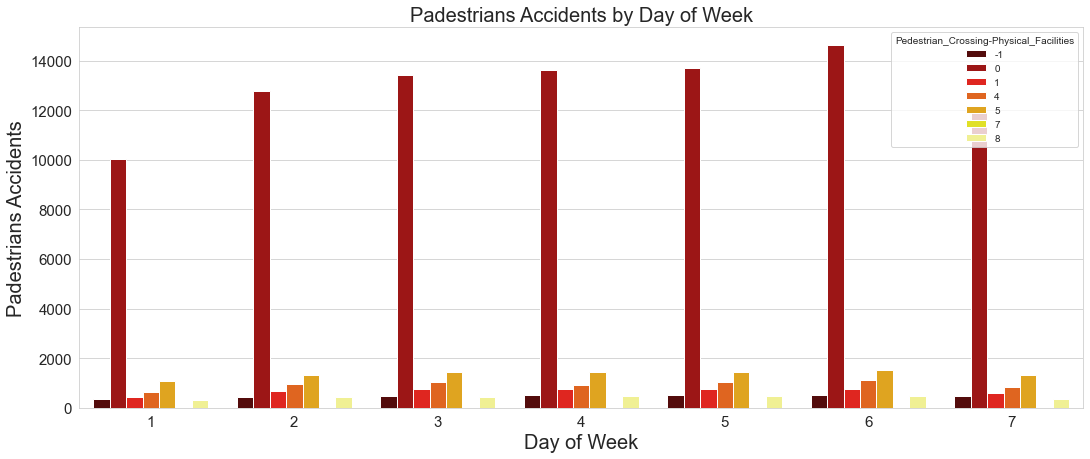

In [161]:
plt.figure(figsize = (18, 7))
sns.barplot(x = "Day_of_Week", y = "count", hue = "Pedestrian_Crossing-Physical_Facilities", data = padestrians_day, palette = "hot")
plt.title("Padestrians Accidents by Day of Week", size = 20)
plt.xlabel("Day of Week", size = 20)
plt.ylabel("Padestrians Accidents", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.savefig("PADW.png")
plt.show()

**(d) What impact, if any, does daylight savings have on road traffic accidents in the week after it starts and stops?**

In [20]:
def daylight(x):
    if x == 1:
        return "Datlight Starts"
    else:
        return "Daylight Stops"
    
df_a["daylight"] = df_a["Light_Conditions"].apply(daylight)

In [21]:
daylight_week = df_a.groupby(["Day_of_Week", "daylight"])["daylight"].agg(["count"]).reset_index()
daylight_week

,Day_of_Week,daylight,count
0,1,Datlight Starts,8494
1,1,Daylight Stops,4441
2,2,Datlight Starts,12275
3,2,Daylight Stops,4368
4,3,Datlight Starts,12965
5,3,Daylight Stops,4633
6,4,Datlight Starts,13111
7,4,Daylight Stops,4664
8,5,Datlight Starts,13025
9,5,Daylight Stops,4948


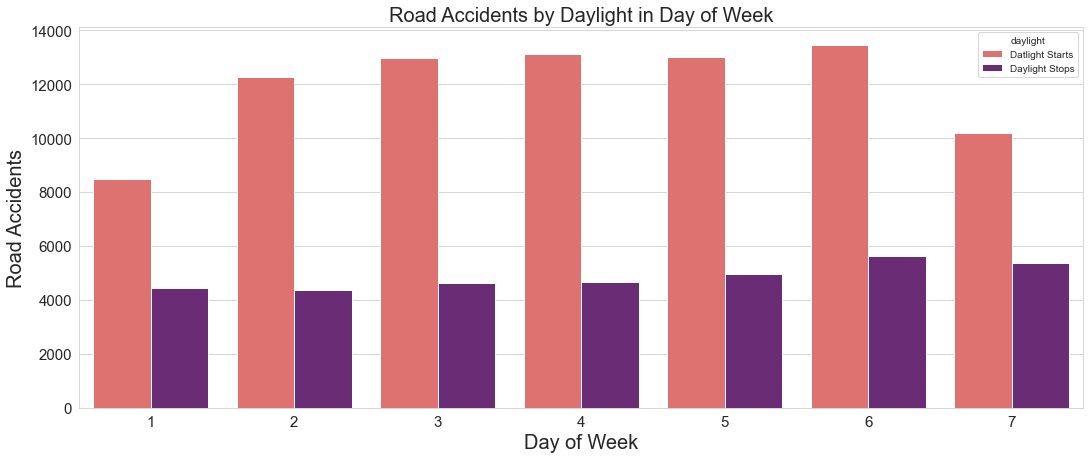

In [162]:
plt.figure(figsize = (18, 7))
sns.barplot(x = "Day_of_Week", y = "count", hue = "daylight", data = daylight_week, palette = "magma_r")
plt.title("Road Accidents by Daylight in Day of Week", size = 20)
plt.xlabel("Day of Week", size = 20)
plt.ylabel("Road Accidents", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.savefig("RADW.png")
plt.show()

**(e)What impact, if any, does sunrise and sunset times have on road traffic accidents?**

In [23]:
df_a["Date"] = pd.to_datetime(df_a["Date"])

In [24]:
df_a["Month"] = df_a["Date"].dt.month

In [25]:
df_a["Hour"].fillna(0, inplace = True)

In [26]:
df_a["Hour"] = df_a["Hour"].astype("int")

In [29]:
def sun(vec):
    month = vec[0]
    hour = vec[1]
    
    if month == 1 and (hour == 8 and hour == 7):
        return "sunrise"
    if month == 1 and hour == 16:
        return "sunset"
    
    if month == 2 and (hour == 7 and hour == 6):
        return "sunrise"
    if month == 2 and (hour == 17 and hour == 16):
        return "sunset"
    
    if month == 3 and (hour == 6 and hour == 5):
        return "sunrise"
    if month == 3 and (hour == 18 and hour == 17):
        return "sunset"
    
    if month == 4 and (hour == 6 and hour == 5):
        return "sunrise"
    if month == 4 and (hour == 20 and hour == 19):
        return "sunset"
    
    if month == 5 and (hour == 5 and hour == 4):
        return "sunrise"
    if month == 5 and (hour == 21 and hour == 20):
        return "sunset"
    
    if month == 6 and hour == 4:
        return "sunrise"
    if month == 6 and hour == 21:
        return "sunset"
    
    if month == 7 and (hour == 5 and hour == 4):
        return "sunrise"
    if month == 7 and (hour == 21 and hour == 20):
        return "sunset"
    
    if month == 8 and (hour == 6 and hour == 5):
        return "sunrise"
    if month == 8 and (hour == 20 and hour == 19):
        return "sunset"
    
    if month == 9 and hour == 6:
        return "sunrise"
    if month == 9 and (hour == 19 and hour == 18):
        return "sunset"
    
    if month == 10 and (hour == 6):
        return "sunrise"
    if month == 10 and (hour == 19 and hour == 18):
        return "sunset"
    
    if month == 11 and (hour == 7 and hour == 6):
        return "sunrise"
    if month == 11 and (hour == 16 and hour == 15):
        return "sunset"
    
    if month == 12 and (hour == 8 and hour == 7):
        return "sunrise"
    if month == 12 and hour == 15:
        return "sunset"
    
df_a["sun_rise_set"] = df_a[["Month", "Hour"]].apply(sun, axis = 1)

In [34]:
accidents_sun = df_a["sun_rise_set"].value_counts().to_frame().reset_index()
accidents_sun.columns = ["Sun", "Accidents"]
accidents_sun

,Sun,Accidents
0,sunset,1649
1,sunrise,498


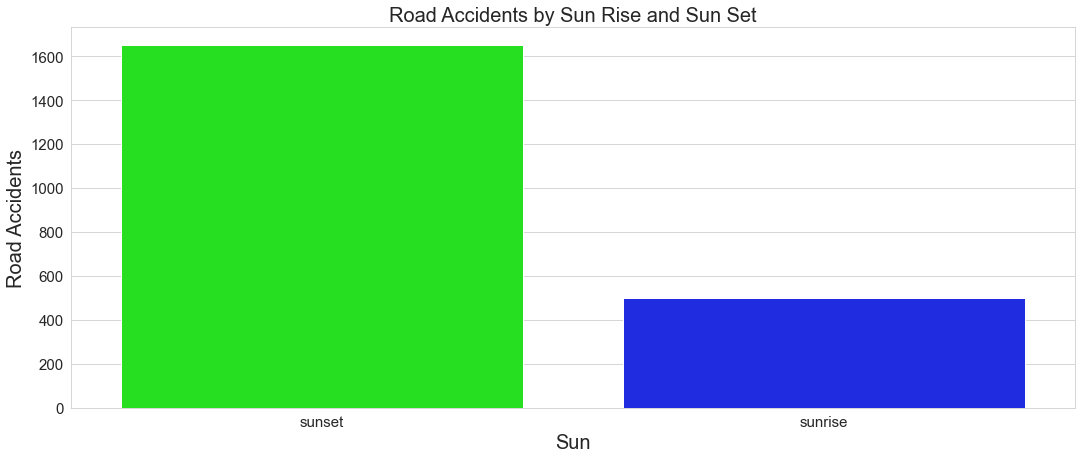

In [163]:
plt.figure(figsize = (18, 7))
sns.barplot(x = "Sun", y = "Accidents", data = accidents_sun, palette = "hsv")
plt.title("Road Accidents by Sun Rise and Sun Set", size = 20)
plt.xlabel("Sun", size = 20)
plt.ylabel("Road Accidents", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.savefig("rass.png")
plt.show()

**(f) Are there particular types of vehicles that are more frequently involved in road traffic accidents?**

Top 10 Most Number of Accidents By Age of Vehicle

In [49]:
av = df["Age_of_Vehicle"].value_counts().to_frame().reset_index()
av.columns = ["Age of Vehicles", "Accidents"]
av = av.head(10)
av = av.sort_values(by = "Age of Vehicles")
av

,Age of Vehicles,Accidents
0,-1,51503
2,1,9762
4,2,9510
1,3,9964
3,4,9690
5,5,8691
6,6,7785
8,7,6963
9,11,6773
7,12,7313


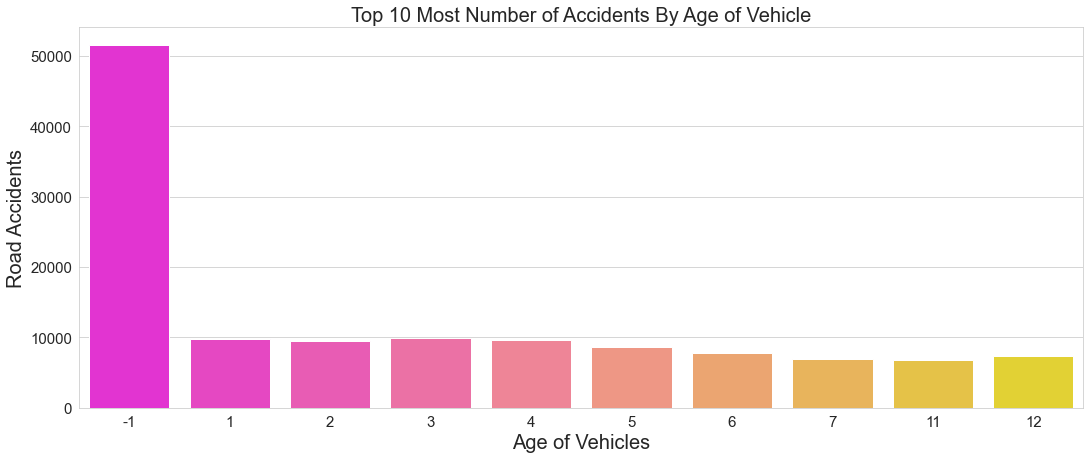

In [164]:
plt.figure(figsize = (18, 7))
sns.barplot(x = "Age of Vehicles", y = "Accidents", data = av, palette = "spring")
plt.title("Top 10 Most Number of Accidents By Age of Vehicle", size = 20)
plt.xlabel("Age of Vehicles", size = 20)
plt.ylabel("Road Accidents", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.savefig("AAV.png")
plt.show()

Road Accidents By Vehicle Propulsion

In [55]:
vra = df["Propulsion_Code"].value_counts().sort_index().to_frame().reset_index()
vra.columns = ["Vehicle Propulsion", "Road Accidents"]
vra

,Vehicle Propulsion,Road Accidents
0,-1,45602
1,1,68961
2,2,56890
3,3,292
4,5,36
5,6,10
6,7,90
7,8,3738
8,9,1
9,12,45


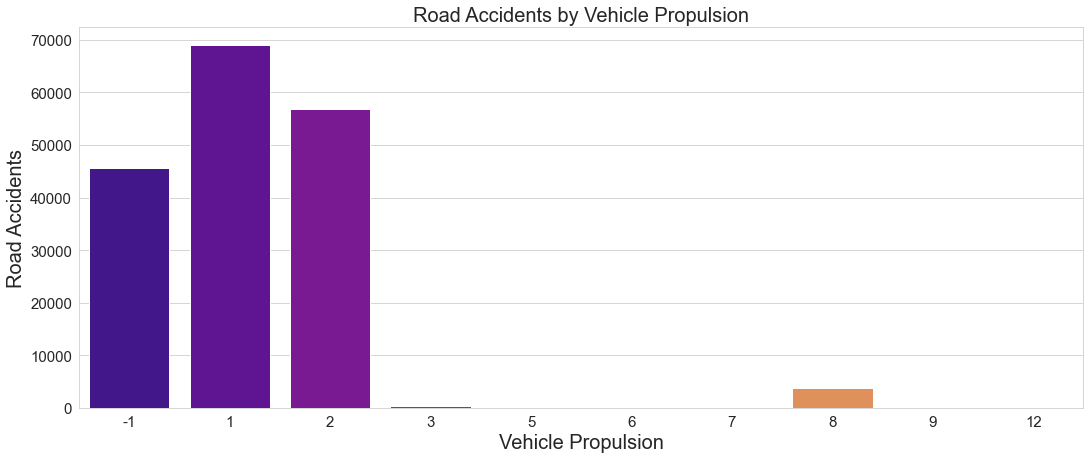

In [166]:
plt.figure(figsize = (18, 7))
sns.barplot(x = "Vehicle Propulsion", y = "Road Accidents", data = vra, palette = "plasma")
plt.title("Road Accidents by Vehicle Propulsion", size = 20)
plt.xlabel("Vehicle Propulsion", size = 20)
plt.ylabel("Road Accidents", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.savefig("VP.png")
plt.show()

**(g) Are there particular conditions (weather, geographic location, situations) that generate more road traffic accidents?**

Road Accidents by Weather conditions

In [60]:
wc = df_a["Weather_Conditions"].value_counts().sort_index().to_frame().reset_index()
wc.columns = ["Weather Condition", "Road Accidents"]
wc

,Weather Condition,Road Accidents
0,1,92316
1,2,15294
2,3,353
3,4,1230
4,5,1430
5,6,40
6,7,394
7,8,3043
8,9,3436


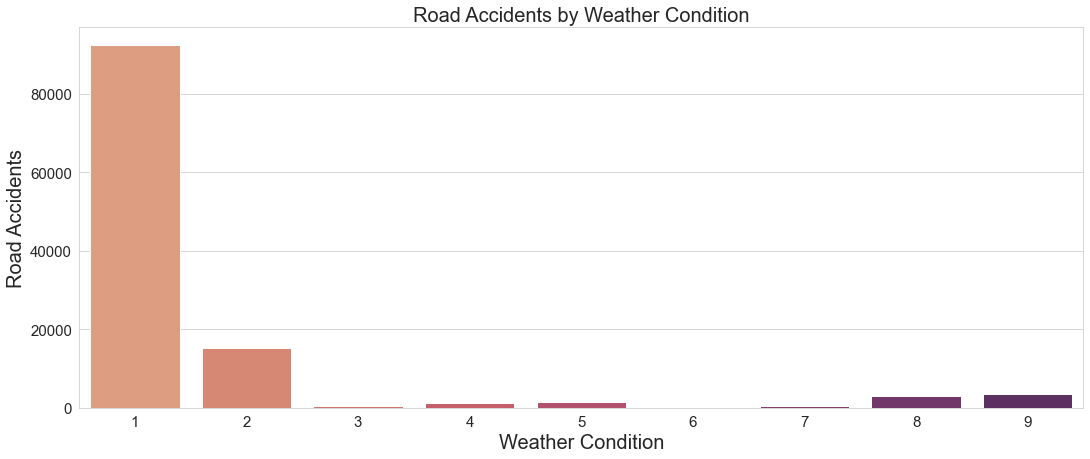

In [168]:
plt.figure(figsize = (18, 7))
sns.barplot(x = "Weather Condition", y = "Road Accidents", data = wc, palette = "flare")
plt.title("Road Accidents by Weather Condition", size = 20)
plt.xlabel("Weather Condition", size = 20)
plt.ylabel("Road Accidents", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.savefig("RAWC.png")
plt.show()

Road Accidents by Geographic Location

In [64]:
ra_gl = df_a["Local_Authority_(District)"].value_counts().to_frame().reset_index()
ra_gl.columns = ["District", "Road Accidents"]
ra_gl = ra_gl.head(10)
ra_gl

,District,Road Accidents
0,300,2623
1,1,1521
2,204,1451
3,9,1191
4,596,1132
5,5,1131
6,8,1096
7,27,983
8,601,967
9,20,955


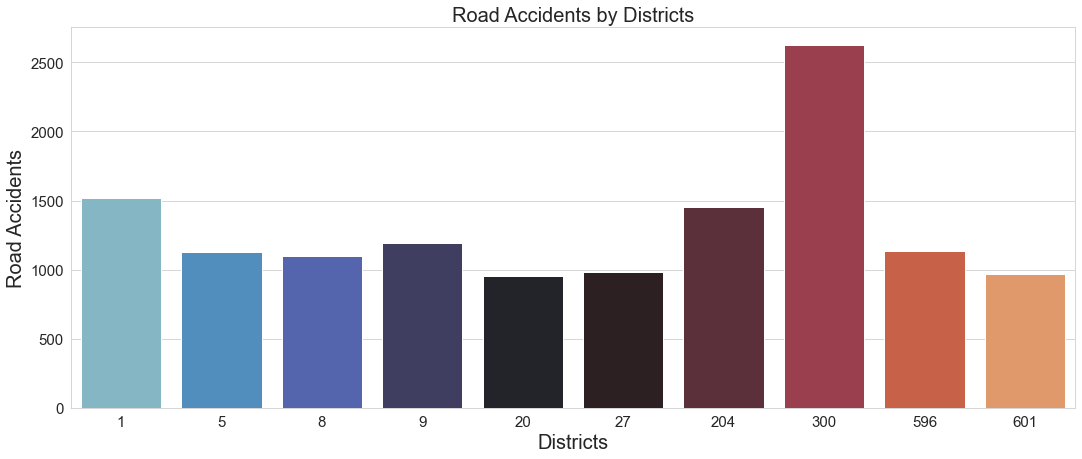

In [169]:
plt.figure(figsize = (18, 7))
sns.barplot(x = "District", y = "Road Accidents", data = ra_gl, palette = "icefire")
plt.title("Road Accidents by Districts", size = 20)
plt.xlabel("Districts", size = 20)
plt.ylabel("Road Accidents", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.savefig("RAD.png")
plt.show()

**Road Accidents by Road Type**

In [69]:
rr = df_a["Road_Type"].value_counts().to_frame().reset_index()
rr.columns = ["Road Type", "Accidents"]
rr

,Road Type,Accidents
0,6,85320
1,3,18590
2,1,6880
3,2,2664
4,9,2143
5,7,1939


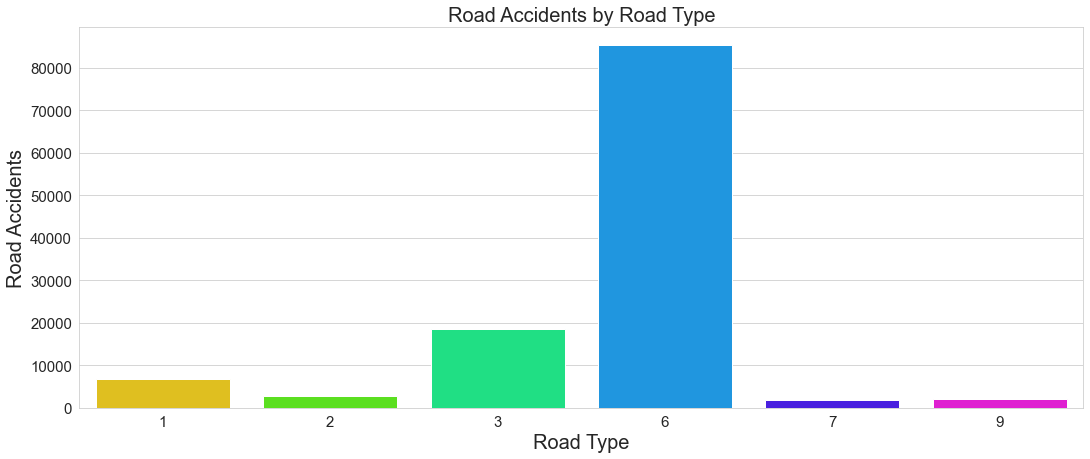

In [170]:
plt.figure(figsize = (18, 7))
sns.barplot(x = "Road Type", y = "Accidents", data = rr, palette = "hsv")
plt.title("Road Accidents by Road Type", size = 20)
plt.xlabel("Road Type", size = 20)
plt.ylabel("Road Accidents", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.savefig("RART.png")
plt.show()

**(h) How does driver related variables affect the outcome (e.g., age of the driver, and the purpose of the journey)?**

In [77]:
da = df_v["Age_of_Driver"].value_counts().to_frame().reset_index()
da.columns = ["Age of Driver", "Accidents"]
da = da.head(10)
da.sort_values(by = "Age of Driver")

,Age of Driver,Accidents
0,-1,29756
3,25,4675
8,26,4345
6,27,4413
4,28,4579
2,29,4734
1,30,6423
7,31,4366
5,32,4431
9,33,4288


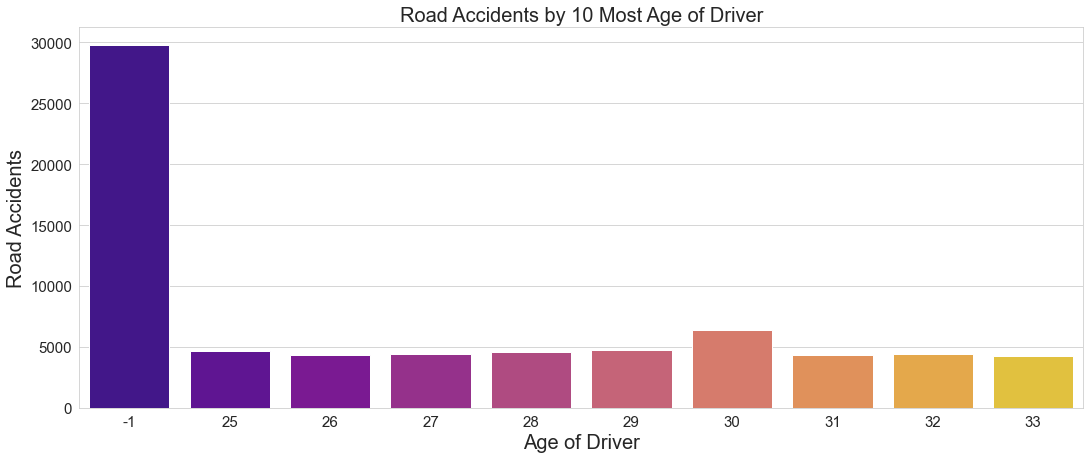

In [171]:
plt.figure(figsize = (18, 7))
sns.barplot(x = "Age of Driver", y = "Accidents", data = da, palette = "plasma")
plt.title("Road Accidents by 10 Most Age of Driver", size = 20)
plt.xlabel("Age of Driver", size = 20)
plt.ylabel("Road Accidents", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.savefig("RAAD.png")
plt.show()

Road Accidents by Journey purpose of Driver

In [80]:
raj = df_v["Journey_Purpose_of_Driver"].value_counts().to_frame().reset_index()
raj.columns = ["Journey Purpose", "Road Accidents"]
raj

,Journey Purpose,Road Accidents
0,6,128259
1,1,30692
2,5,29807
3,2,24390
4,3,2356
5,4,819
6,-1,58


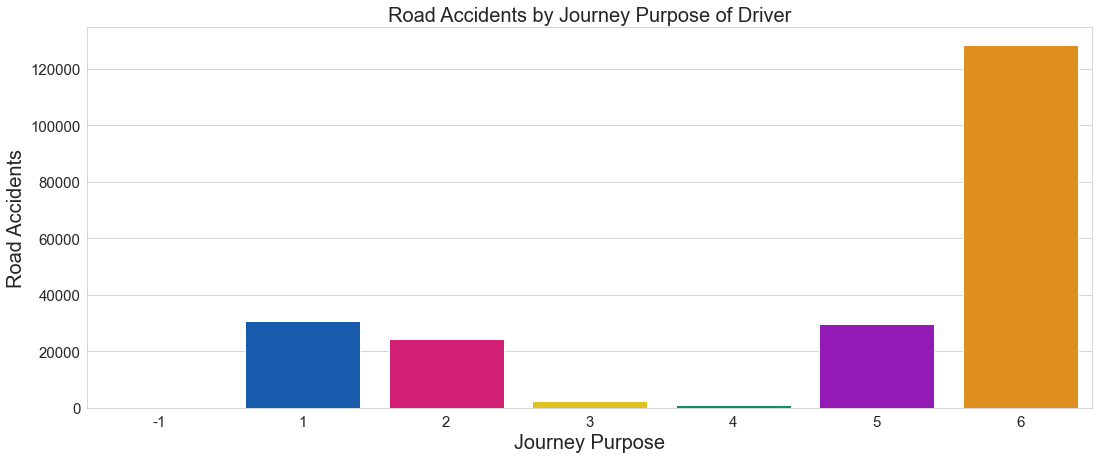

In [172]:
plt.figure(figsize = (18, 7))
sns.barplot(x = "Journey Purpose", y = "Road Accidents", data = raj, palette = "prism")
plt.title("Road Accidents by Journey Purpose of Driver", size = 20)
plt.xlabel("Journey Purpose", size = 20)
plt.ylabel("Road Accidents", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.savefig("rajp.png")
plt.show()

### Prediction for When Accidents will occur

Relevant features selected in a separate file

In [92]:
w = pd.read_csv("when.csv")
w.head(2)

,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Time,1st_Road_Class,Road_Type,Speed_limit,2nd_Road_Class,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area
0,3,2,3,17:50,3,1,30,3,1,1,1,0,0,1
1,3,2,1,21:45,3,2,30,-1,4,1,1,0,0,1


In [93]:
w = w.dropna()

In [94]:
w["Hour"] = w["Time"].str.split(":").str.get(0)

In [95]:
w["Hour"] = w["Hour"].astype("int")

In [96]:
del w["Time"]

### Random Forest

In [97]:
X = w[w.columns.drop("Hour")]

y = w["Hour"]

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 4611)

In [101]:
rfw = RandomForestClassifier()

rfw.fit(X_train, y_train)

rfw_pred = rfw.predict(X_test)
pd.DataFrame({"Actual": y_test,
              "Predicted": rfw_pred}).head(10)

,Actual,Predicted
61756,17,8
8063,7,10
35969,16,8
74667,15,16
17516,2,22
114206,14,10
39816,19,20
33856,23,18
8846,17,15
35006,17,16


In [103]:
accuracy_score(y_test, rfw_pred)

0.09746754628644393

### Predictions for Where Accidents will occur

Relevant features selected in a separate file

In [110]:
ur = pd.read_csv("UR.csv")
ur.head()

,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,1st_Road_Class,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area
0,3,2,3,3,1,30,1,2,3,5,1,1,1,0,0,1
1,3,2,1,3,2,30,0,-1,-1,-1,4,1,1,0,0,1
2,3,2,1,4,6,30,3,4,6,0,4,1,1,0,0,1
3,2,1,1,4,6,20,3,4,4,0,4,1,1,0,0,1
4,3,2,2,3,6,30,6,4,6,0,4,1,1,0,0,1


In [106]:
X = ur[ur.columns.drop("Urban_or_Rural_Area")]

y = ur["Urban_or_Rural_Area"]

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 4611)

In [108]:
rf_ur = RandomForestClassifier()

rf_ur.fit(X_train, y_train)

pred_rfur = rf_ur.predict(X_test)

pd.DataFrame({"Actual": y_test,
              "Predicted": pred_rfur}).head(10)

,Actual,Predicted
40077,2,1
22758,1,1
59355,1,1
56690,1,1
70630,2,1
44038,1,1
25711,2,2
6578,1,1
6771,1,1
1725,1,1


In [109]:
accuracy_score(y_test, pred_rfur)

0.860685724008848

### Accident Severity Prediction

In [111]:
X = ur[ur.columns.drop("Accident_Severity")]

y = ur["Accident_Severity"]

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 4611)

In [114]:
rf_ur = RandomForestClassifier()

rf_ur.fit(X_train, y_train)

pred_rfs = rf_ur.predict(X_test)

pd.DataFrame({"Actual": y_test,
              "Predicted": pred_rfs}).head(10)

,Actual,Predicted
40077,3,3
22758,3,3
59355,2,3
56690,3,3
70630,3,3
44038,3,3
25711,2,3
6578,1,3
6771,2,3
1725,3,3


In [115]:
accuracy_score(y_test, pred_rfs)

0.7651437808405649